In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 2.0 MB/s eta 0:03:10
   ---------------------------------------- 1.3/376.0 MB 2.1 MB/s eta 0:02:59
   ---------------------------------------- 1.8/376.0 MB 2.3 MB/s eta 0:02:44
   ---------------------------------------- 2.1/376.0 MB 2.1 MB/s eta 0:02:59
   ---------------------------------------- 2.6/376.0 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 3.1/376.0 MB 2.2 MB/s eta 0:02:50
   ---------------------------------------- 3.4/376.0 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 3.9/376.0 MB 2.1 MB/s eta 0:02:55
   ---------------------------------------- 4.5/376.0 MB 2.2 MB/s eta 0:02:52
    --------------------------------------- 5.0/376.0 MB 2.2 MB/s eta 0:02:49
    --------------------------------------- 5.5/376.0 MB 2.2 MB/s eta 0:02:47

In [6]:
!pip install tensorflow

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas 
import numpy
import keras

In [16]:
from sklearn import datasets

In [37]:
pip install scikeras

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [58]:
data = pandas.read_csv("Iris_flower_dataset.csv", header =None)
data.head()

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


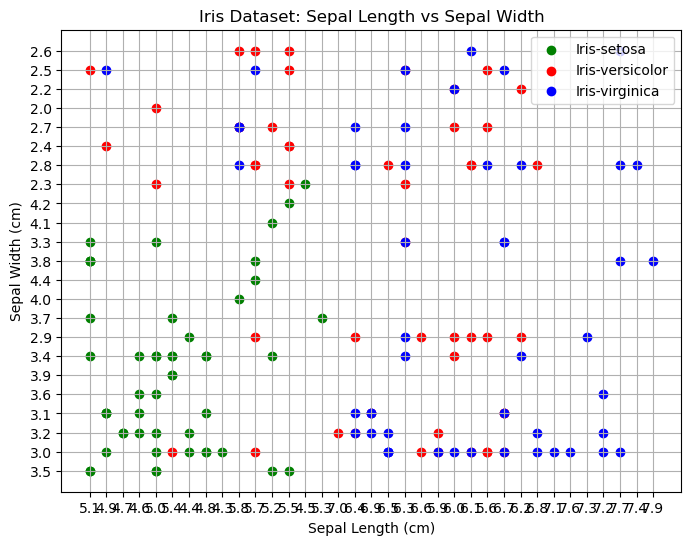

In [60]:
data.columns = ["Id", "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]

color_map = {
    "Iris-setosa": "green",
    "Iris-versicolor": "red",
    "Iris-virginica": "blue"
}


plt.figure(figsize=(8,6))
for species, color in color_map.items():
    subset = data[data["Species"] == species]
    plt.scatter(subset["SepalLengthCm"], subset["SepalWidthCm"], label=species, color=color)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Dataset: Sepal Length vs Sepal Width")
plt.legend()
plt.grid(True)
plt.show()

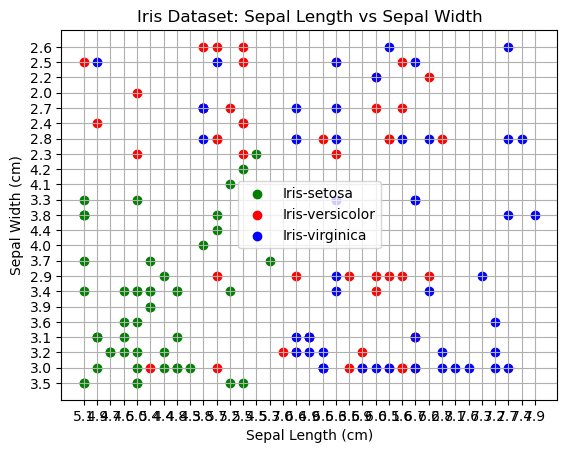

In [62]:
import matplotlib.pyplot as plt

# Scatter plot for Sepal dimensions
plt.scatter(data[data['Species'] == 'Iris-setosa']['SepalLengthCm'],
            data[data['Species'] == 'Iris-setosa']['SepalWidthCm'],
            color='green', label='Iris-setosa')

plt.scatter(data[data['Species'] == 'Iris-versicolor']['SepalLengthCm'],
            data[data['Species'] == 'Iris-versicolor']['SepalWidthCm'],
            color='red', label='Iris-versicolor')

plt.scatter(data[data['Species'] == 'Iris-virginica']['SepalLengthCm'],
            data[data['Species'] == 'Iris-virginica']['SepalWidthCm'],
            color='blue', label='Iris-virginica')

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Dataset: Sepal Length vs Sepal Width")
plt.legend()
plt.grid(True)
plt.show()

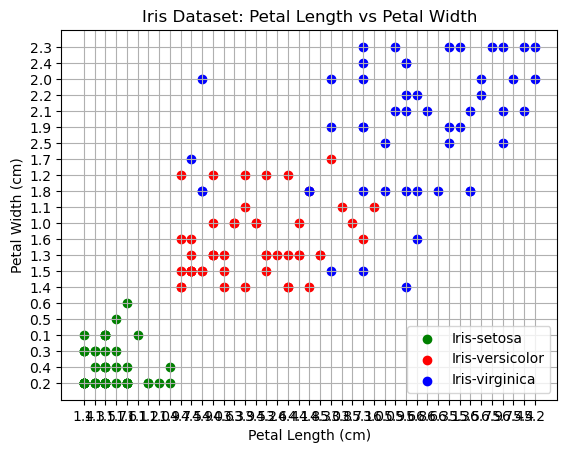

In [64]:
plt.scatter(data[data['Species'] == 'Iris-setosa']['PetalLengthCm'],
            data[data['Species'] == 'Iris-setosa']['PetalWidthCm'],
            color='green', label='Iris-setosa')

plt.scatter(data[data['Species'] == 'Iris-versicolor']['PetalLengthCm'],
            data[data['Species'] == 'Iris-versicolor']['PetalWidthCm'],
            color='red', label='Iris-versicolor')

plt.scatter(data[data['Species'] == 'Iris-virginica']['PetalLengthCm'],
            data[data['Species'] == 'Iris-virginica']['PetalWidthCm'],
            color='blue', label='Iris-virginica')

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Dataset: Petal Length vs Petal Width")
plt.legend()
plt.grid(True)
plt.show()

In [74]:
X=data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y=data["Species"].values

In [78]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
dummy_y=to_categorical(encoded_y)

In [80]:
def baseline_model():
    model=Sequential()
    model.add(Dense(8, inpt_dim=4,activation='relu'))
    model.add(Dense(3, activation=' softmax'))
    model.complie(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

In [100]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Set seed
seed = 7
np.random.seed(seed)

# Create dummy data
X, dummy_y = make_classification(n_samples=100, n_features=20, random_state=seed)
estimator = LogisticRegression()

# Set up KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Evaluate
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline Accuracy: %.2f%% (= %.2f%%)" % (results.mean()*100, results.std()*100))

Baseline Accuracy: 93.00% (= 7.81%)
